In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [5]:
path_to_results = '/home/ng213/2TB/pazy_code/pazy-aepw3-results/05_StraightWingFlutter/'
output_figures_folder = '../figures_aiaaj/'

In [172]:
results = {}

results['sharpy_wo_skin'] = {'path': path_to_results + '/skin_off/',
                            'skin': False,
                             'label': 'SHARPy Skin off',
                            'marker_style': {'facecolor': 'none',
                                            'marker': 'o',
                                            'linewidth': 0.5}}

results['sharpy_w_skin'] = {'path': path_to_results + '/skin_on/',
                            'skin': True,
                             'label': 'SHARPy Skin on',
                            'marker_style': {'facecolor': 'none',
                                             'marker': 'o',
                                            'linewidth': 0.5}}

results['sharpy_wo_skin_te'] = {'path': path_to_results + '/skin_offte_mass/',
                            'skin': False,
                             'label': 'SHARPy Skin off, TE mass',
                                'marker_style': {'facecolor': 'none',
                                             'marker': 'o',
                                            'linewidth': 0.5}}

results['sharpy_w_skin_te'] = {'path': path_to_results + '/skin_onte_mass/',
                                'skin': True,
                               'label': 'SHARPy Skin on, TE mass',
                               'marker_style': {'facecolor': 'none',
                                             'marker': 's',
                                            'linewidth': 0.5}}

mrmresults = {}
mrmresults['mrm_w_skin'] = {'path': path_to_results + '/mrm_umbeam_w_skin',
                           'skin': True,
                           'label': 'MRM Skin on',
                           'marker_style': {
                               'marker': '^',
                               'edgecolor':'k', 'marker':'^', 'linewidth':.15,
                           }}
mrmresults['mrm_wo_skin'] = {'path': path_to_results + '/mrm_umbeam_wo_skin',
                           'skin': False,
                           'label': 'MRM Skin off',
                           'marker_style': {
                               'marker': '^', 'edgecolor':'k', 'marker':'^', 'linewidth':.15,
                           }}

In [173]:
for case in results.values():
    case['eigs'] = np.loadtxt(case['path'] + '/vel_eigs.txt')
    case['vg'] = np.loadtxt(case['path'] + '/stability_analysis.txt')
    with open(case['path'] + '/flutter.txt', 'r') as f:
        case['flutter_str'] = f.read()

In [174]:
for case in mrmresults.values():
    case['vg'] = np.loadtxt(case['path'] + '/velocity_damping_frequency_alpha0000.txt')
    case['eigs'] = np.loadtxt(case['path'] + '/velocity_eigenvalues_alpha0000.txt')

In [136]:
for k, case in results.items():
    print(k)
    print('\t' + case['flutter_str'])

sharpy_wo_skin
	Flutter speed = 63.0035 m/s
sharpy_w_skin
	Flutter speed = 65.0016 m/s
sharpy_wo_skin_te
	Flutter speed = 84.0064 m/s
sharpy_w_skin_te
	Flutter speed = 89.0001 m/s


mrm_w_skin
mrm_wo_skin


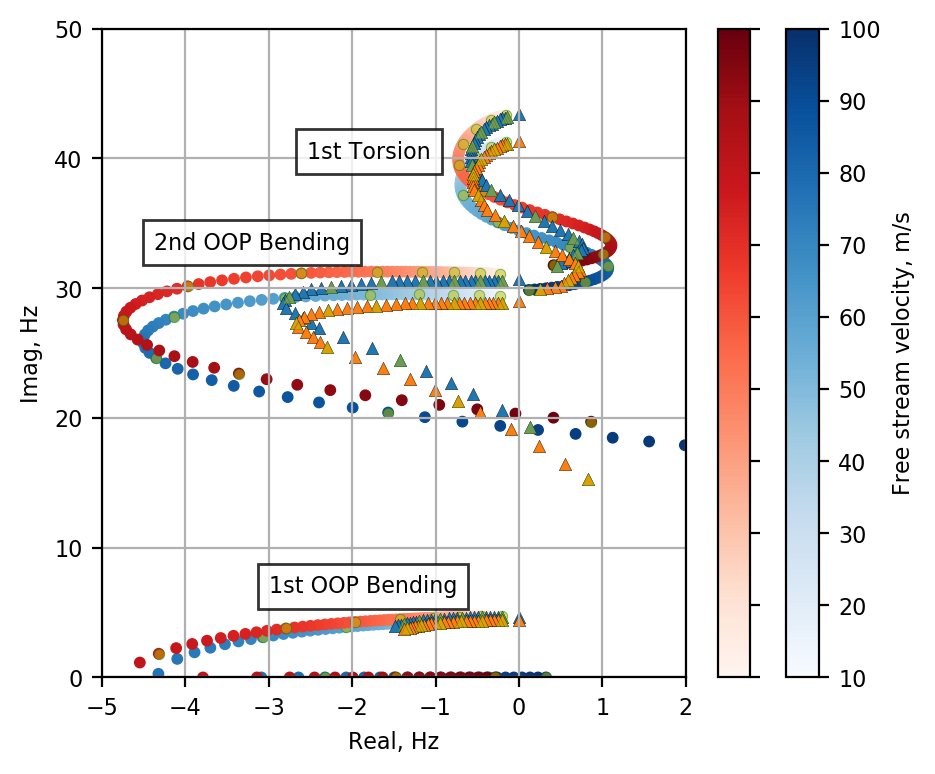

In [175]:
cm2in = 1/2.54
ar = 1.2
width_cm = 12

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(ncols=1, figsize=figsize)

for name, case in results.items():
    if case['skin']:
        a = ax
        cmap='Reds'
#         lab = 'Skin on'
    else:
        a = ax
        cmap='Blues'
#         lab = 'Skin off'
        
    if 'te' in name:
        continue
        cmap = 'Greens'
    a.scatter(case['eigs'][:, 1] / 2 /np.pi, case['eigs'][:, 2]/2/np.pi, c=case['eigs'][:, 0], cmap=cmap,
             s=14, **case['marker_style'], label=case['label'])
    
    for vel in np.linspace(10, 120, 12):
        vel_ind = (case['eigs'][:, 0] == vel)
        a.scatter(case['eigs'][vel_ind, 1] / 2/np.pi, case['eigs'][vel_ind, 2]/2/np.pi, 
                  marker=case['marker_style']['marker'], color='y', edgecolor='g', s=14, linewidth=0.35, alpha=0.5)
    
    
for name, case in mrmresults.items():
    if case['skin']:
        a = ax
        cmap='Reds'
#         lab = 'Skin on'
    else:
        a = ax
        cmap='Blues'
#         lab = 'Skin off'
        
    if 'te' in name:
        continue
        cmap = 'Greens'
    print(name)
    a.scatter(case['eigs'][:, 1] / 2/ np.pi, case['eigs'][:, 2] / 2/ np.pi, 
              #c=case['eigs'][:, 0], cmap=cmap,
              **case['marker_style'], label=case['label'], s=20, lw=0.15)
    
    for vel in np.linspace(10, 120, 12):
        try:
            vel_ind = np.argwhere((case['eigs'][:, 0] >= vel) * (case['eigs'][:, 0] <= vel + 1))
        except IndexError:
            break
        a.scatter(case['eigs'][vel_ind, 1] / 2/np.pi, case['eigs'][vel_ind, 2]/2/np.pi, marker=case['marker_style']['marker'], 
                  color='y', edgecolor='g', s=20, linewidth=0.15, alpha=0.5)
    
    
# mode description
ax.text(-3, 6.5, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8)
ax.text(-3.2, 33, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')
ax.text(-1.8, 40, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')


# for a in ax
a.set_xlim(-5, 2)
a.set_ylim(0., 50)
a.grid()
a.set_xlabel('Real, Hz')
a.set_ylabel('Imag, Hz')

# sm = mpl.cm.ScalarMappable(norm=plt.Normalize(vmin=10, vmax=100), cmap='Blues')
# cb = plt.colorbar(sm, ax=a)
# cb.set_label('Free stream velocity, m/s', fontsize=8)
# cb.ax.tick_params(labelsize=8)

sm = mpl.cm.ScalarMappable(norm=plt.Normalize(vmin=10, vmax=100), cmap='Blues')
cb = plt.colorbar(sm, ax=ax,  fraction=0.05)
cb.set_label('Free stream velocity, m/s', fontsize=8)
cb.ax.tick_params(labelsize=8)
cb2 = plt.colorbar(mpl.cm.ScalarMappable(norm=plt.Normalize(vmin=10, vmax=100), cmap='Reds'), ax=ax, fraction=0.05)
cb2.ax.set_yticklabels([])


for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
    item.set_fontsize(8)
# plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig(output_figures_folder + '04_StraightFlutterEigs.pdf')

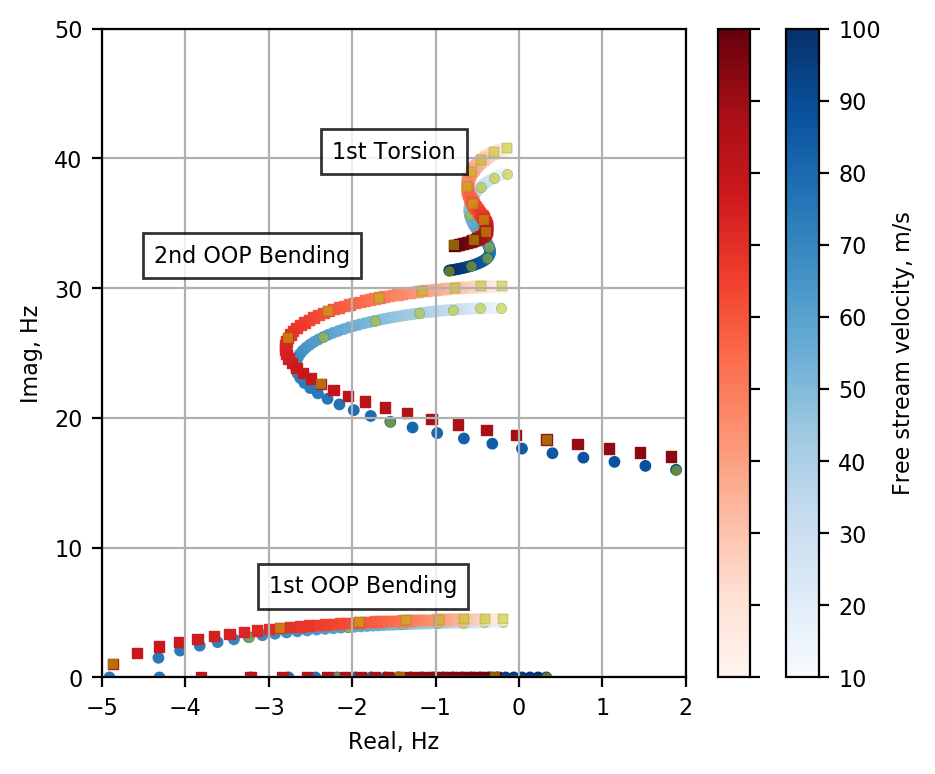

In [176]:
cm2in = 1/2.54
ar = 1.2
width_cm = 12

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(ncols=1, figsize=figsize)

for name, case in results.items():
    if case['skin']:
        a = ax
        cmap='Reds'
#         lab = 'Skin on'
    else:
        a = ax
        cmap='Blues'

    if 'te' not in name:
        continue
#         cmap = 'Greens'

    a.scatter(case['eigs'][:, 1] / 2 /np.pi, case['eigs'][:, 2]/2/np.pi, c=case['eigs'][:, 0], cmap=cmap,
             s=14, **case['marker_style'], label=case['label'])

    for vel in np.linspace(10, 120, 12):
        vel_ind = (case['eigs'][:, 0] == vel)
        a.scatter(case['eigs'][vel_ind, 1] / 2/np.pi, case['eigs'][vel_ind, 2]/2/np.pi, 
                  marker=case['marker_style']['marker'], color='y', edgecolor='g', s=14, linewidth=0.15, alpha=0.5)    
    
# # mode description
ax.text(-3, 6.5, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8)
ax.text(-3.2, 32, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')
ax.text(-1.5, 40, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')


# for a in ax
a.set_xlim(-5, 2)
a.set_ylim(0., 50)
a.grid()
a.set_xlabel('Real, Hz')
a.set_ylabel('Imag, Hz')

sm = mpl.cm.ScalarMappable(norm=plt.Normalize(vmin=10, vmax=100), cmap='Blues')
cb = plt.colorbar(sm, ax=ax,  fraction=0.05)
cb.set_label('Free stream velocity, m/s', fontsize=8)
cb.ax.tick_params(labelsize=8)
cb2 = plt.colorbar(mpl.cm.ScalarMappable(norm=plt.Normalize(vmin=10, vmax=100), cmap='Reds'), ax=ax, fraction=0.05)
cb2.ax.set_yticklabels([])


for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
    item.set_fontsize(8)
# plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig(output_figures_folder + '04_StraightFlutterEigs_TE.pdf')

(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)
(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)
(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)


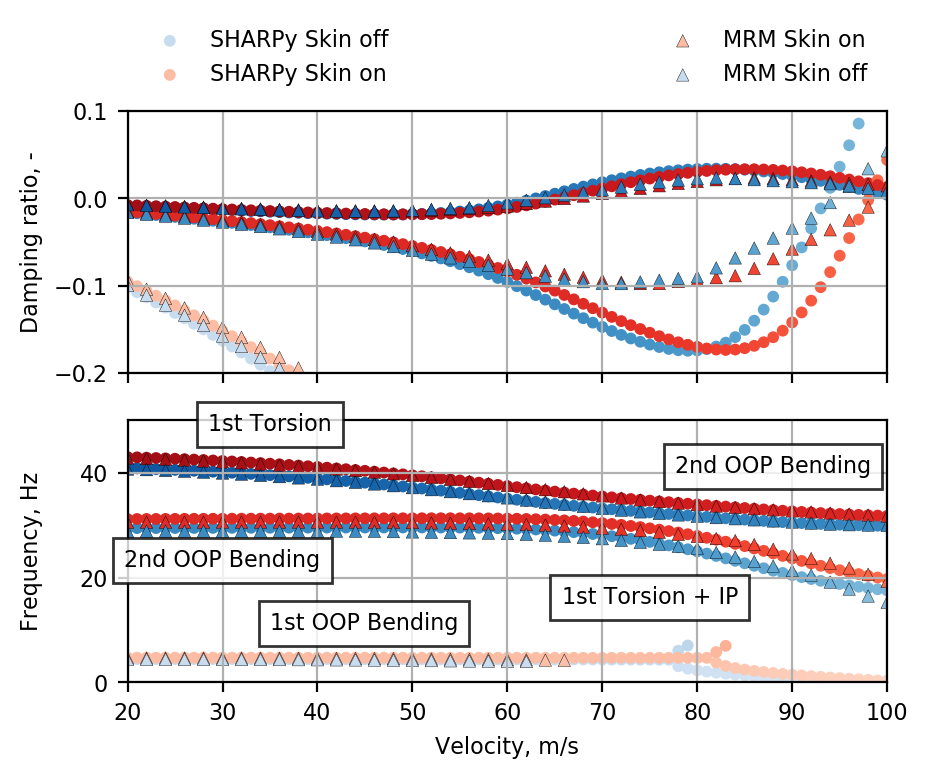

In [180]:
cm2in = 1/2.54
ar = 1.2
width_cm = 12

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=figsize)
nrm2 = plt.Normalize(vmin=-10, vmax=50)

for name, case in results.items():
    if case['skin']:
        cmap = plt.get_cmap('Reds')
        color=plt.get_cmap('Reds')(1.0)
        lab = 'Skin on'
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
#         case['marker_style']['facecolor'] = color
    else:
        color=plt.get_cmap('Blues')(0.8)
        cmap = plt.get_cmap('Blues')
        print(color)
        lab = 'Skin off'
#         case['marker_style']['facecolor'] = 'none'
#         case['marker_style']['edgecolor'] = color
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
    cond = case['vg'][:, 2] < 50
    if 'te' in name:
        continue
        color='tab:green'
        case['marker_style']['alpha'] = 0.8
        case['marker_style']['facecolor'] = 'none'
        


    ax[0].scatter(case['vg'][cond, 0], case['vg'][cond, 1], s=14, facecolor=cmap(nrm2(case['vg'][cond, 2])), label=case['label'], **case['marker_style'])
    ax[1].scatter(case['vg'][cond, 0], case['vg'][cond, 2], s=14, facecolor=cmap(nrm2(case['vg'][cond, 2])),
                  **case['marker_style'])
    
for name, case in mrmresults.items():
    if case['skin']:
        cmap = plt.get_cmap('Reds')
        color=plt.get_cmap('Reds')(1.0)
        lab = 'Skin on'
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
#         case['marker_style']['facecolor'] = color
    else:
        color=plt.get_cmap('Blues')(0.8)
        cmap = plt.get_cmap('Blues')
        print(color)
        lab = 'Skin off'
#         case['marker_style']['facecolor'] = 'none'
#         case['marker_style']['edgecolor'] = color
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
    cond = case['vg'][:, 2] < 50
    if 'te' in name:
        continue
        color='tab:green'
        case['marker_style']['alpha'] = 0.8
        case['marker_style']['facecolor'] = 'none'
        
    ax[0].scatter(case['vg'][cond, 0], case['vg'][cond, 1], facecolor=cmap(nrm2(case['vg'][cond, 2])), label=case['label'], **case['marker_style'], s=20)
    ax[1].scatter(case['vg'][cond, 0], case['vg'][cond, 2], facecolor=cmap(nrm2(case['vg'][cond, 2])),
                  **case['marker_style'], s=20)
    
ax[0].set_ylim(-0.2, 0.1)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s')
ax[1].set_ylabel('Frequency, Hz')
ax[0].set_ylabel('Damping ratio, -')
ax[1].set_xlim(20, 100)
ax[0].legend(frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2, mode='expand', fontsize=8)


# ax[0].legend(fontsize=8)
# ax[0].set_title('Skin off')

# mode description
ax[1].text(35, 10, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8)
ax[1].text(30, 22, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')
ax[1].text(35, 48, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')

ax[1].text(88, 40, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')
ax[1].text(75, 15, '1st Torsion + IP', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')


for a in ax:
    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

# ax[0].set_ylim(-0.01, 0.01)
plt.tight_layout()
fig.align_ylabels(ax)
plt.savefig(output_figures_folder + '04_StraightFlutterVg.pdf')

### VGF with TE mass

(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)
(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)
(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)


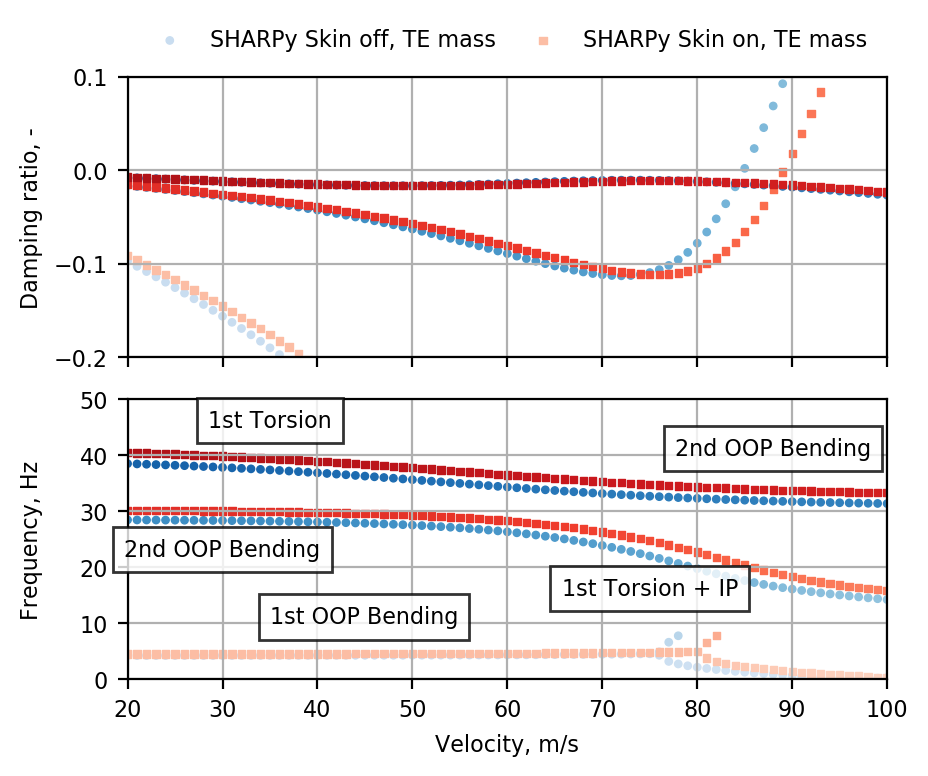

In [182]:
cm2in = 1/2.54
ar = 1.2
width_cm = 12

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=figsize)
nrm2 = plt.Normalize(vmin=-10, vmax=50)

for name, case in results.items():
    if case['skin']:
        cmap = plt.get_cmap('Reds')
        color=plt.get_cmap('Reds')(1.0)
        lab = 'Skin on'
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
#         case['marker_style']['facecolor'] = color
    else:
        color=plt.get_cmap('Blues')(0.8)
        cmap = plt.get_cmap('Blues')
        print(color)
        lab = 'Skin off'
#         case['marker_style']['facecolor'] = 'none'
#         case['marker_style']['edgecolor'] = color
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
    cond = case['vg'][:, 2] < 50
    if 'te' not in name:
        continue
        


    ax[0].scatter(case['vg'][cond, 0], case['vg'][cond, 1], s=7, facecolor=cmap(nrm2(case['vg'][cond, 2])), label=case['label'], **case['marker_style'])
    ax[1].scatter(case['vg'][cond, 0], case['vg'][cond, 2], s=7, facecolor=cmap(nrm2(case['vg'][cond, 2])),
                  **case['marker_style'])
    
for name, case in mrmresults.items():
    if case['skin']:
        cmap = plt.get_cmap('Reds')
        color=plt.get_cmap('Reds')(1.0)
        lab = 'Skin on'
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
#         case['marker_style']['facecolor'] = color
    else:
        color=plt.get_cmap('Blues')(0.8)
        cmap = plt.get_cmap('Blues')
        print(color)
        lab = 'Skin off'
#         case['marker_style']['facecolor'] = 'none'
#         case['marker_style']['edgecolor'] = color
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
    cond = case['vg'][:, 2] < 50
    if 'te' not in name:
        continue
        
    ax[0].scatter(case['vg'][cond, 0], case['vg'][cond, 1], facecolor=cmap(nrm2(case['vg'][cond, 2])), label=case['label'], **case['marker_style'], s=18)
    ax[1].scatter(case['vg'][cond, 0], case['vg'][cond, 2], facecolor=cmap(nrm2(case['vg'][cond, 2])),
                  **case['marker_style'], s=18)
    
ax[0].set_ylim(-0.2, 0.1)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s')
ax[1].set_ylabel('Frequency, Hz')
ax[0].set_ylabel('Damping ratio, -')
ax[1].set_xlim(20, 100)
ax[0].legend(frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=3, mode='expand', fontsize=8)


# ax[0].legend(fontsize=8)
# ax[0].set_title('Skin off')

# mode description
ax[1].text(35, 10, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8)
ax[1].text(30, 22, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')
ax[1].text(35, 45, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')

ax[1].text(88, 40, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')
ax[1].text(75, 15, '1st Torsion + IP', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=8, horizontalalignment='center')


for a in ax:
    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

# ax[0].set_ylim(-0.01, 0.01)
plt.tight_layout()
fig.align_ylabels(ax)
plt.savefig(output_figures_folder + '04_StraightFlutterVg_TE.pdf')

(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)
(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)
{'marker': 'o', 'linewidth': 0.5, 'facecolor': 'none'}
{'marker': 's', 'linewidth': 0.5}


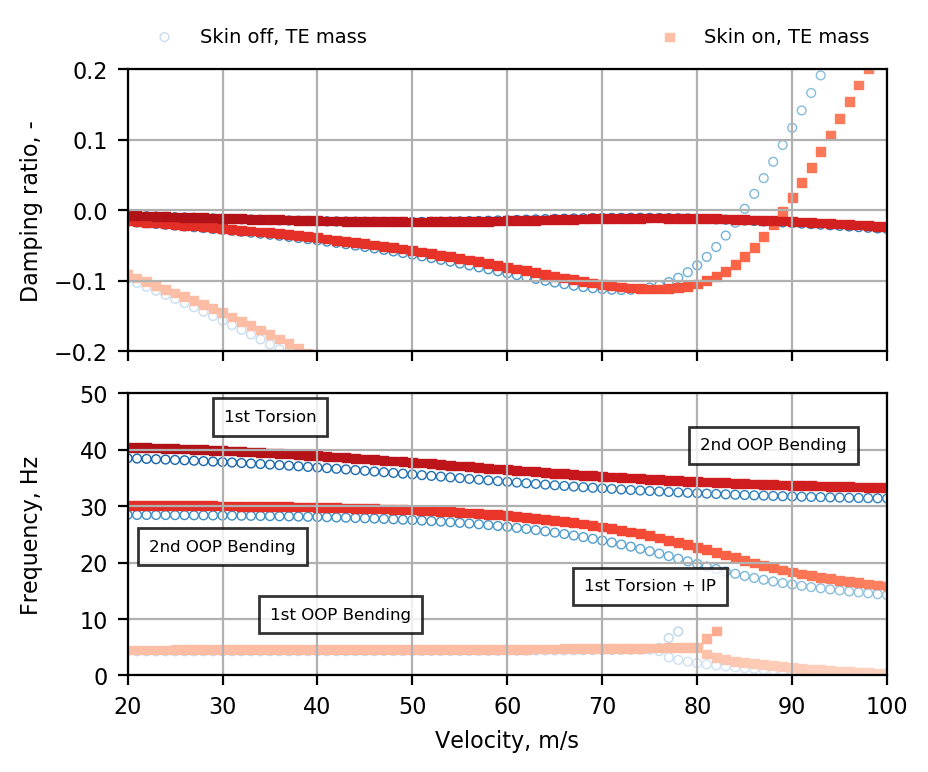

In [61]:
cm2in = 1/2.54
ar = 1.2
width_cm = 12

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=figsize)
nrm2 = plt.Normalize(vmin=-10, vmax=50)

for name, case in results.items():
    if case['skin']:
        cmap = plt.get_cmap('Reds')
        color=plt.get_cmap('Reds')(1.0)
        lab = 'Skin on'
        try:
            del case['marker_style']['facecolor']
            del case['marker_style']['edgecolor']


        except KeyError:
            pass
#         case['marker_style']['facecolor'] = color
    else:
        color=plt.get_cmap('Blues')(0.8)
        cmap = plt.get_cmap('Blues')
        print(color)
        lab = 'Skin off'
#         case['marker_style']['facecolor'] = 'none'
#         case['marker_style']['edgecolor'] = color
        try:
            del case['marker_style']['facecolor']
            del case['marker_style']['edgecolor']

        except KeyError:
            pass
        case['marker_style']['facecolor'] = 'none'
    cond = case['vg'][:, 2] < 50
    if 'te' not in name:
        continue

    print(case['marker_style'])
    ax[0].scatter(case['vg'][cond, 0], case['vg'][cond, 1], s=10, color=cmap(nrm2(case['vg'][cond, 2])), label=case['label'], **case['marker_style'])
    ax[1].scatter(case['vg'][cond, 0], case['vg'][cond, 2], s=10, color=cmap(nrm2(case['vg'][cond, 2])), 
                  **case['marker_style'])
    
ax[0].set_ylim(-0.2, 0.2)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s')
ax[1].set_ylabel('Frequency, Hz')
ax[0].set_ylabel('Damping ratio, -')
ax[1].set_xlim(20, 100)
ax[0].legend(frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=4, mode='expand', fontsize=7)


# ax[0].legend(fontsize=8)
# ax[0].set_title('Skin off')

# mode description
ax[1].text(35, 10, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6)
ax[1].text(30, 22, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(35, 45, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')

ax[1].text(88, 40, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(75, 15, '1st Torsion + IP', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')


for a in ax:
    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

# ax[0].set_ylim(-0.01, 0.01)
plt.tight_layout()
fig.align_ylabels(ax)
# plt.savefig(output_figures_folder + '04_StraightFlutterVg_TE.pdf')

# Trying to add the MRM....

(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)
(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)
[0.         4.09205621 4.41544218 4.49598564 4.51864045 4.52616623
 4.52880823 4.52917457 4.52792591 4.52757585 4.52722288 4.52651173
 4.52580899 4.52261686 4.52003646 4.51797179 4.51494204 4.51287406
 4.51140527 4.5103284  4.50951805 4.50889446 4.50840563 4.50705158]
[0.         4.06213163 4.39306804 4.47840619 4.503638   4.51258589
 4.51609731 4.5176455  4.51672702 4.51644123 4.51613972 4.51551584
 4.51488294 4.51189181 4.50940054 4.50738232 4.50439704 4.50234861
 4.50089039 4.49981973 4.4990134  4.49839257 4.49790574 4.49655646]


/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide
/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide


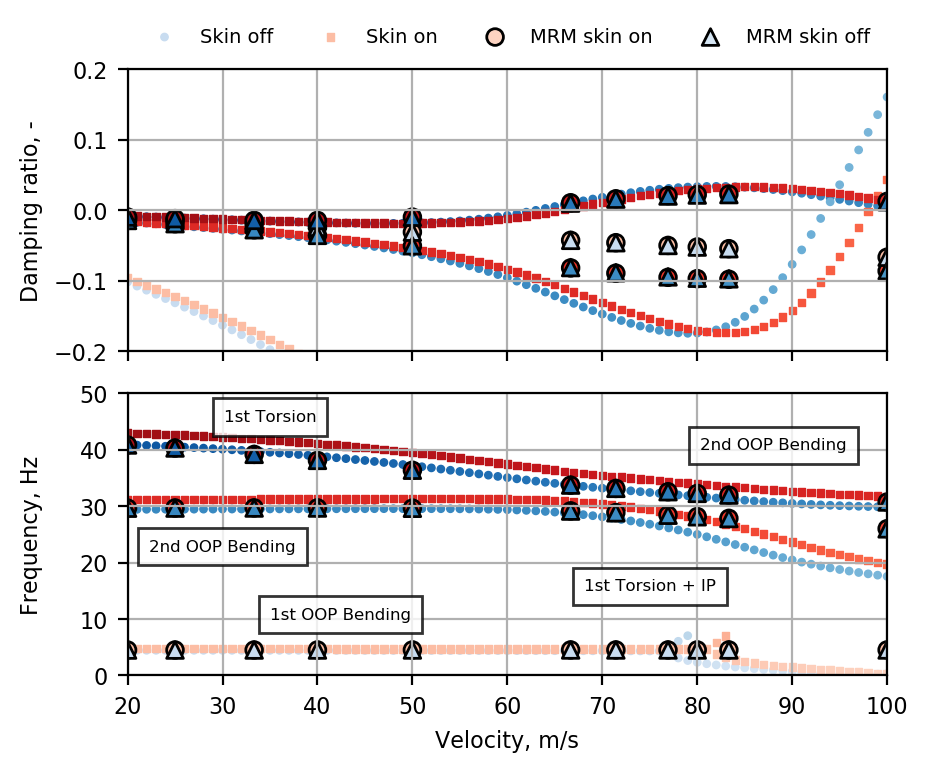

In [50]:
cm2in = 1/2.54
ar = 1.2
width_cm = 12

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=figsize)
nrm2 = plt.Normalize(vmin=-10, vmax=50)

for name, case in results.items():
    if case['skin']:
        cmap = plt.get_cmap('Reds')
        color=plt.get_cmap('Reds')(1.0)
        lab = 'Skin on'
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
#         case['marker_style']['facecolor'] = color
    else:
        color=plt.get_cmap('Blues')(0.8)
        cmap = plt.get_cmap('Blues')
        print(color)
        lab = 'Skin off'
#         case['marker_style']['facecolor'] = 'none'
#         case['marker_style']['edgecolor'] = color
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
    cond = case['vg'][:, 2] < 50
    if 'te' in name:
        continue
        color='tab:green'
        case['marker_style']['alpha'] = 0.8
        case['marker_style']['facecolor'] = 'none'
        


    ax[0].scatter(case['vg'][cond, 0], case['vg'][cond, 1], s=7, facecolor=cmap(nrm2(case['vg'][cond, 2])), label=case['label'], **case['marker_style'])
    ax[1].scatter(case['vg'][cond, 0], case['vg'][cond, 2], s=7, facecolor=cmap(nrm2(case['vg'][cond, 2])),
                  **case['marker_style'])
    
import scipy.io as scio
path_to_mrm = '../mrm_data/'
file_names = {}
file_names['20'] = {'mrm': 'undeformed vg plot with skin',
                    'results': 'mrm_umbeam_w_skin',
                   'skin': 'on',
                   'datervd': 'June2021'}
file_id = 20
mat = scio.loadmat(path_to_mrm + '/' + file_names[str(file_id)]['mrm'] + '.mat')
cmap = plt.get_cmap('Reds')
for i in range(6):
    vel = mat['v'][i, :] / mat['w_ae'][i, :] / 0.005
    damp = mat['g'][i, :] / 2
    fn = mat['w_ae'][i, :] / 2/ np.pi
    condition = fn < 50
    if i == 0:
        print(fn)
        ax[0].scatter(vel[condition], damp[condition], facecolor=cmap(nrm2(fn[condition])), edgecolor='k', marker='o', label='MRM skin on')
    else:
        ax[0].scatter(vel[condition], damp[condition], facecolor=cmap(nrm2(fn[condition])), edgecolor='k', marker='o')
    ax[1].scatter(vel[condition], fn[condition], facecolor=cmap(nrm2(fn[condition])), edgecolor='k', marker='o')
    
file_names['21'] = {'mrm': 'undeformed vg plot no skin',
                    'results': 'mrm_umbeam_wo_skin',
                   'skin': 'off',
                   'datervd': 'June2021'}
file_id = 21
mat = scio.loadmat(path_to_mrm + '/' + file_names[str(file_id)]['mrm'] + '.mat')
cmap = plt.get_cmap('Blues')
for i in range(6):
    vel = mat['v'][i, :] / mat['w_ae'][i, :] / 0.005
#     vel = mat['w_ae'][i, :] * 0.05 / mat['v'][i, :]
    damp = mat['g'][i, :] / 2
    fn = mat['w_ae'][i, :] / 2/ np.pi
    condition = fn < 50
    if i == 0:
        print(fn)
        ax[0].scatter(vel[condition], damp[condition], facecolor=cmap(nrm2(fn[condition])), edgecolor='k', marker='^', label='MRM skin off')
    else:
        ax[0].scatter(vel[condition], damp[condition], facecolor=cmap(nrm2(fn[condition])), edgecolor='k', marker='^')
    ax[1].scatter(vel[condition], fn[condition], facecolor=cmap(nrm2(fn[condition])), edgecolor='k', marker='^')
    
ax[0].set_ylim(-0.2, 0.2)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s')
ax[1].set_ylabel('Frequency, Hz')
ax[0].set_ylabel('Damping ratio, -')
ax[1].set_xlim(20, 100)
ax[0].legend(frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=4, mode='expand', fontsize=7)


# ax[0].legend(fontsize=8)
# ax[0].set_title('Skin off')

# mode description
ax[1].text(35, 10, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6)
ax[1].text(30, 22, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(35, 45, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')

ax[1].text(88, 40, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(75, 15, '1st Torsion + IP', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')


for a in ax:
    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

# ax[0].set_ylim(-0.01, 0.01)
plt.tight_layout()
fig.align_ylabels(ax)
# plt.savefig(output_figures_folder + '04_StraightFlutterVg.pdf')